In [2]:
## Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/var/folders/92/fsnyg0n57cx169y7qtzjg3_w0000gn/T/ipykernel_75353/2180271132.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
## Params

### Matplotlib

# Set the font size for titles
plt.rcParams['axes.titlesize'] = 20

# Set the font size for labels on the x-axis and y-axis
plt.rcParams['axes.labelsize'] = 16

# Set the font size for ticks on the x-axis and y-axis
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set the width of lines in plots
plt.rcParams['lines.linewidth'] = 2.0

# Set the default figure size
plt.rcParams['figure.figsize'] = (12, 6)

# Set the default style to use
plt.style.use('ggplot')

# Set the default savefig format
plt.rcParams['savefig.format'] = 'png'

### Seaborn

# Set the default style
sns.set_style("darkgrid")

# Set the default palette
sns.set_palette("deep")

# Set the default context
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Set the default font
sns.set(font='Arial')

Load Combined DataFrame:

In [4]:
filename = '../../data/combined_data.csv'

df = pd.read_csv(filename)

df.head(10)

,Sold,AvgPrice,YearNum,MonthNum,FishGroup,Country
0,2385.445111,6.900461,2023,1,Cod,USA
1,215.003039,3.703762,2023,1,Haddock,USA
2,32.658689,3.924224,2023,1,Cod,USA
3,5855.430868,5.114718,2023,1,Haddock,USA
4,1518.629061,5.555642,2023,1,Hake,USA
5,159.211111,3.152607,2023,1,Hake,USA
6,2174.524408,2.072343,2023,1,Pollock,USA
7,4376.264390,4.078547,2023,1,Pollock,USA
8,6465.966924,3.240791,2023,1,Pollock,USA
9,1100.869991,8.443695,2023,1,Cod,USA


In [5]:
# create datetime column

df['YYYY/MM'] = pd.to_datetime(df['MonthNum'].astype(str) + df['YearNum'].astype(str), format='%m%Y')
df['YYYY/MM'] = df['YYYY/MM'].dt.to_period('M')
df

,Sold,AvgPrice,YearNum,MonthNum,FishGroup,Country,YYYY/MM
0,2385.445111,6.900461,2023,1,Cod,USA,2023-01
1,215.003039,3.703762,2023,1,Haddock,USA,2023-01
2,32.658689,3.924224,2023,1,Cod,USA,2023-01
3,5855.430868,5.114718,2023,1,Haddock,USA,2023-01
4,1518.629061,5.555642,2023,1,Hake,USA,2023-01
...,...,...,...,...,...,...,...
5652,49532.000000,7.301744,2013,8,Haddock,UNITED KINGDOM,2013-08
5653,158618.000000,2.314870,2020,5,Cod,GERMANY,2020-05
5654,158618.000000,2.314870,2020,6,Cod,GERMANY,2020-06
5655,33715.000000,4.629660,2016,3,Cod,NORWAY,2016-03


In [6]:
# hwne looking a specifc month there are multiple entries from the same country for the same fish, these shoud be consolidated

period_to_filter = pd.Period('2022-01', 'M')
data_2023_01 = df[df['YYYY/MM'] == period_to_filter]
data_2023_01

,Sold,AvgPrice,YearNum,MonthNum,FishGroup,Country,YYYY/MM
167,872.259165,6.922507,2022,1,Cod,USA,2022-01
168,29.029946,2.513267,2022,1,Haddock,USA,2022-01
169,1373.932923,3.505346,2022,1,Pollock,USA,2022-01
170,1469.187434,4.806072,2022,1,Haddock,USA,2022-01
171,5014.469614,4.276963,2022,1,Pollock,USA,2022-01
172,622.783065,2.755775,2022,1,Hake,USA,2022-01
173,319.783001,7.561847,2022,1,Cod,USA,2022-01
174,3394.689334,4.276963,2022,1,Haddock,USA,2022-01
175,1038.274170,4.872210,2022,1,Hake,USA,2022-01
176,371.039000,2.711683,2022,1,Redfish,USA,2022-01


In [7]:
# set index to dt col

df_dt_idx = df.set_index('YYYY/MM', inplace=False)

# group by dt, fishgroup, and country and aggregate, then reset index
df_agg = df_dt_idx.groupby(['YYYY/MM', 'FishGroup', 'Country']).agg(
    Sold=('Sold', 'sum'),
    AvgPrice=('AvgPrice', lambda x: (x * df_dt_idx.loc[x.index, 'Sold']).sum() / x.sum())
).reset_index()

df_agg.head(20)

,YYYY/MM,FishGroup,Country,Sold,AvgPrice
0,2004-01,Cod,USA,37891.790876,6.845493e+05
1,2004-01,Haddock,USA,24066.278996,4.563662e+05
2,2004-01,Hake,USA,103171.068030,1.140915e+06
3,2004-01,Pollock,USA,56597.962461,4.563662e+05
4,2004-01,Redfish,USA,6455.987880,2.281831e+05
5,2004-02,Cod,USA,57071.967051,1.361938e+06
6,2004-02,Haddock,USA,120841.687003,9.079587e+05
7,2004-02,Hake,USA,139801.417024,1.815917e+06
8,2004-02,Pollock,USA,120811.749871,9.079587e+05
9,2004-02,Redfish,USA,15452.549646,4.539794e+05


In [8]:
# check to see if consolidation happened

period_to_filter = pd.Period('2022-01', 'M')
data_2023_01 = df_agg[df_agg['YYYY/MM'] == period_to_filter]
data_2023_01

,YYYY/MM,FishGroup,Country,Sold,AvgPrice
2245,2022-01,Cod,ICELAND,475690.000000,6.955157e+06
2246,2022-01,Cod,NETHERLANDS,16116.000000,2.318386e+06
2247,2022-01,Cod,NORWAY,303977.000000,9.273543e+06
2248,2022-01,Cod,RUSSIAN FEDERATION,296100.000000,4.636772e+06
2249,2022-01,Cod,USA,1194.763723,6.955157e+06
2250,2022-01,Haddock,FAROE IS.,133664.000000,2.318386e+06
2251,2022-01,Haddock,ICELAND,226339.000000,4.636772e+06
2252,2022-01,Haddock,NORWAY,579858.000000,6.955157e+06
2253,2022-01,Haddock,RUSSIAN FEDERATION,260483.000000,4.636772e+06
2254,2022-01,Haddock,USA,4892.906714,6.955157e+06


In [9]:
# check that prices were averaged correctly

df_grouped_fish = df.groupby('FishGroup')[['AvgPrice', 'Sold']].mean()
df_agg_grouped_fish = df_agg.groupby('FishGroup')[['AvgPrice', 'Sold']].mean()
assert(df_agg_grouped_fish['AvgPrice'].values.all() == df_grouped_fish['AvgPrice'].values.all())

df_agg_grouped_fish

,AvgPrice,Sold
FishGroup,,
Cod,3.362464e+06,126679.765299
Haddock,2.954128e+06,148623.351942
Hake,3.077646e+06,64090.820759
Pollock,2.791375e+06,51506.781159
Redfish,1.160786e+06,8114.627427


In [10]:
# explore new dataframe
print(df_agg.shape)
df_agg.info()

(2596, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   YYYY/MM    2596 non-null   period[M]
 1   FishGroup  2596 non-null   object   
 2   Country    2596 non-null   object   
 3   Sold       2596 non-null   float64  
 4   AvgPrice   2596 non-null   float64  
dtypes: float64(2), object(2), period[M](1)
memory usage: 101.5+ KB


In [11]:
df_agg.describe()

,Sold,AvgPrice
count,2.596000e+03,2.596000e+03
mean,1.002164e+05,2.898238e+06
std,1.728907e+05,2.596233e+06
min,1.678294e+01,3.454192e+04
25%,7.106667e+03,1.067362e+06
50%,2.683000e+04,1.971533e+06
75%,1.128013e+05,4.058225e+06
max,1.613404e+06,2.075925e+07


In [12]:
# add a column for imported/domestic

df_agg['Imported'] = np.where(df_agg['Country'] != 'USA', 'Yes', 'No')
df.sample(10)

,Sold,AvgPrice,YearNum,MonthNum,FishGroup,Country,YYYY/MM
4747,43107.000000,6.861299,2020,3,Cod,ICELAND,2020-03
1734,21775.181210,3.791946,2013,6,Hake,USA,2013-06
4338,2462.000000,5.511779,2018,1,Pollock,ICELAND,2018-01
5045,21163.000000,16.556301,2022,10,Cod,NORWAY,2022-10
2429,71071.205015,1.785742,2009,10,Pollock,USA,2009-10
3059,45814.698225,2.755775,2005,9,Hake,USA,2005-09
2014,481.262077,2.777821,2011,3,Hake,USA,2011-03
1412,1178.887972,7.098876,2015,7,Cod,USA,2015-07
414,17.236531,1.609373,2021,7,Haddock,USA,2021-07
911,2316.045396,4.056501,2018,7,Pollock,USA,2018-07


In [13]:
imported_vs_domenstic_rows = df_agg.Imported.value_counts()
imported_vs_domenstic_rows

Imported
Yes    1398
No     1198
Name: count, dtype: int64

In [14]:
avg_price_by_country = df_agg.groupby(['Country','FishGroup'])['AvgPrice'].mean()
avg_price_by_country

Country             FishGroup
ALBANIA             Hake         4.326531e+05
BOSNIA-HERCEGOVINA  Hake         1.627271e+06
BULGARIA            Hake         1.027960e+06
CROATIA             Hake         8.005714e+05
DENMARK             Cod          1.797496e+06
                                     ...     
USA                 Cod          3.158613e+06
                    Haddock      3.026378e+06
                    Hake         4.353714e+06
                    Pollock      3.306126e+06
                    Redfish      1.088715e+06
Name: AvgPrice, Length: 62, dtype: float64

In [15]:
total_sold_by_country = df_agg.groupby('Country')['Sold'].sum().sort_values(ascending=False)
total_sold_by_country

Country
ICELAND               8.667980e+07
NORWAY                7.005015e+07
RUSSIAN FEDERATION    3.580477e+07
USA                   3.350622e+07
FAROE IS.             1.006980e+07
UKRAINE               1.001132e+07
GREENLAND             2.716470e+06
ITALY                 2.293609e+06
POLAND                1.926441e+06
LITHUANIA             1.187259e+06
PORTUGAL              8.954290e+05
GERMANY               8.076490e+05
NETHERLANDS           6.095150e+05
ROMANIA               5.234270e+05
UNITED KINGDOM        5.190200e+05
BULGARIA              4.933100e+05
GREECE                4.922960e+05
SPAIN                 4.044030e+05
DENMARK               3.816480e+05
CROATIA               3.366160e+05
SERBIA & KOSOVO       1.157130e+05
LATVIA                8.620600e+04
BOSNIA-HERCEGOVINA    7.201400e+04
SWEDEN                5.152000e+04
IRELAND               4.800000e+04
MONTENEGRO            4.082400e+04
ALBANIA               2.380000e+04
FRANCE                1.454600e+04
Name: Sold, 

## Visualize

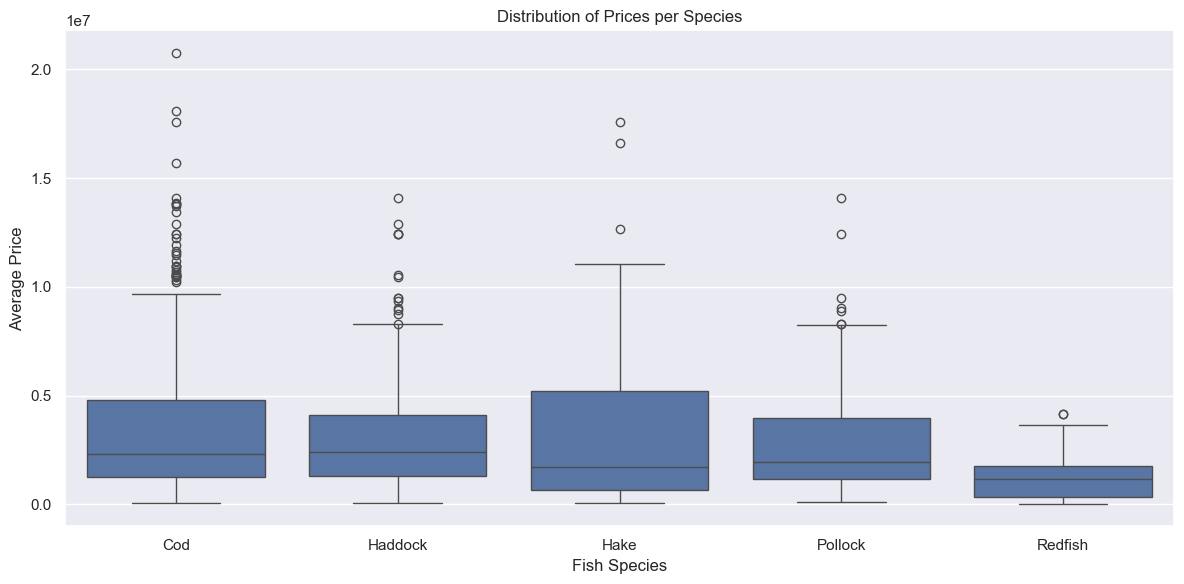

In [16]:
sns.boxplot(data=df_agg, x='FishGroup', y='AvgPrice')
plt.xlabel('Fish Species')
plt.ylabel('Average Price')
plt.title('Distribution of Prices per Species')
plt.tight_layout()
plt.show();

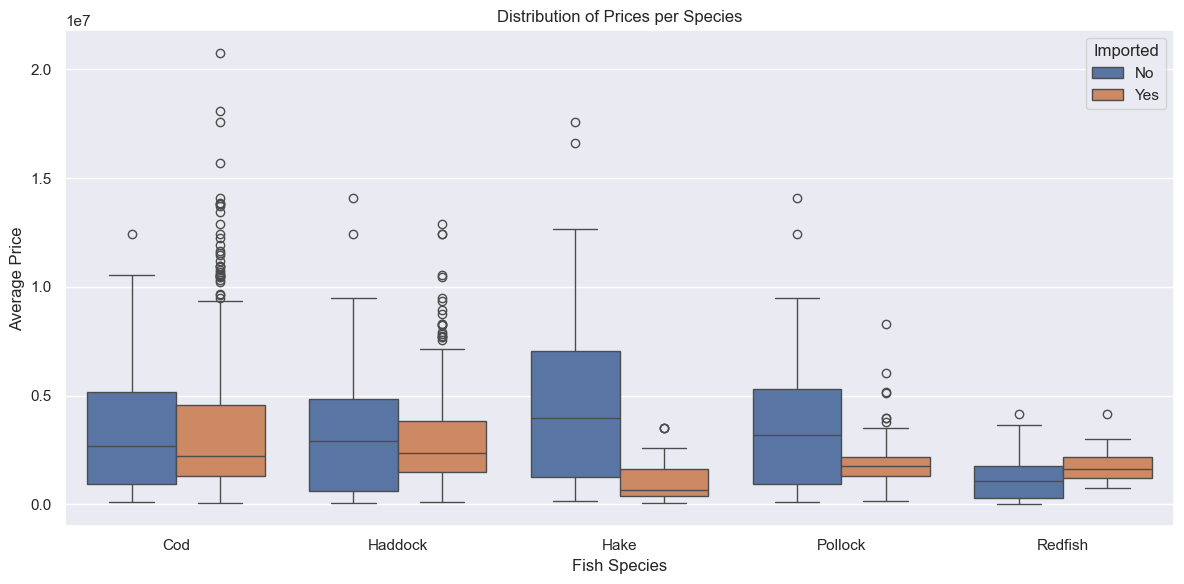

In [17]:
sns.boxplot(data=df_agg, x='FishGroup', y='AvgPrice', hue='Imported', dodge=True)
plt.xlabel('Fish Species')
plt.ylabel('Average Price')
plt.title('Distribution of Prices per Species')
plt.tight_layout()
plt.show();

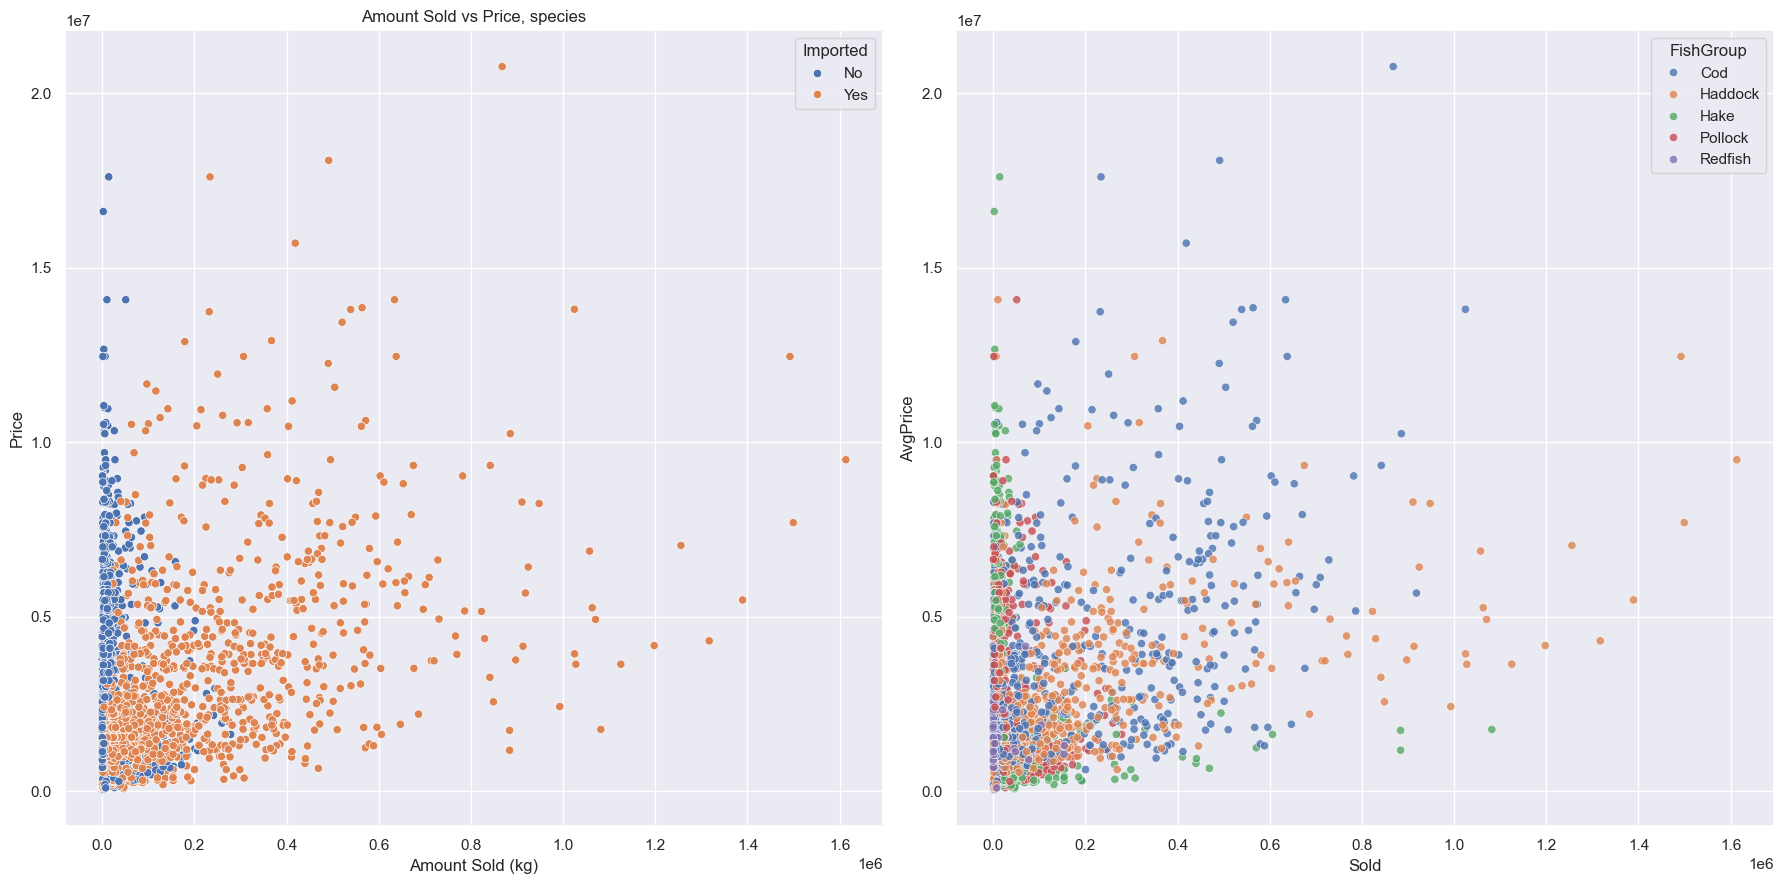

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18,9))

sns.scatterplot(ax=ax[0], data=df_agg, x='Sold', y='AvgPrice', hue='Imported')
ax[0].set_xlabel('Amount Sold (kg)')
ax[0].set_ylabel('Price')
ax[0].set_title('Amount Sold vs Price, origin')



sns.scatterplot(ax=ax[1], data=df_agg, x='Sold', y='AvgPrice', hue='FishGroup', alpha=0.8)
ax[0].set_xlabel('Amount Sold (kg)')
ax[0].set_ylabel('Price')
ax[0].set_title('Amount Sold vs Price, species')


plt.tight_layout()
plt.show();

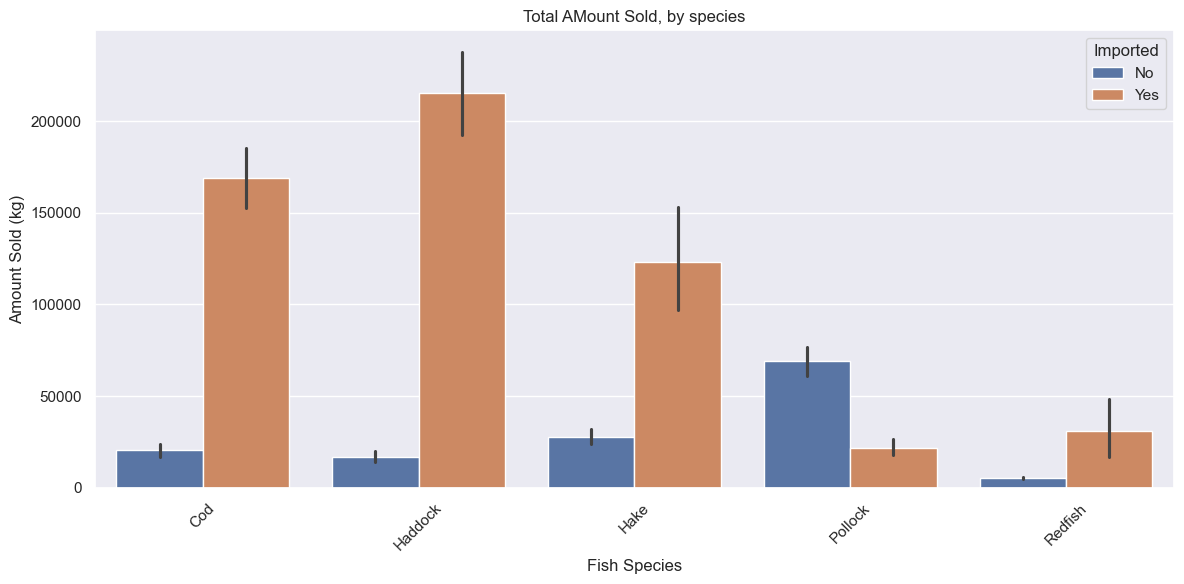

In [19]:
sns.barplot(data=df_agg, x='FishGroup', y='Sold', hue='Imported')
plt.xlabel('Fish Species')
plt.ylabel('Amount Sold (kg)')
plt.title('Total AMount Sold, by species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

In [28]:
df_agg

,YYYY/MM,FishGroup,Country,Sold,AvgPrice,Imported
0,2004-01,Cod,USA,37891.790876,6.845493e+05,No
1,2004-01,Haddock,USA,24066.278996,4.563662e+05,No
2,2004-01,Hake,USA,103171.068030,1.140915e+06,No
3,2004-01,Pollock,USA,56597.962461,4.563662e+05,No
4,2004-01,Redfish,USA,6455.987880,2.281831e+05,No
...,...,...,...,...,...,...
2591,2023-12,Hake,SPAIN,2547.000000,1.365568e+06,Yes
2592,2023-12,Hake,USA,5860.420390,5.462272e+06,No
2593,2023-12,Pollock,ICELAND,1016.000000,1.365568e+06,Yes
2594,2023-12,Pollock,USA,16793.823879,4.096704e+06,No


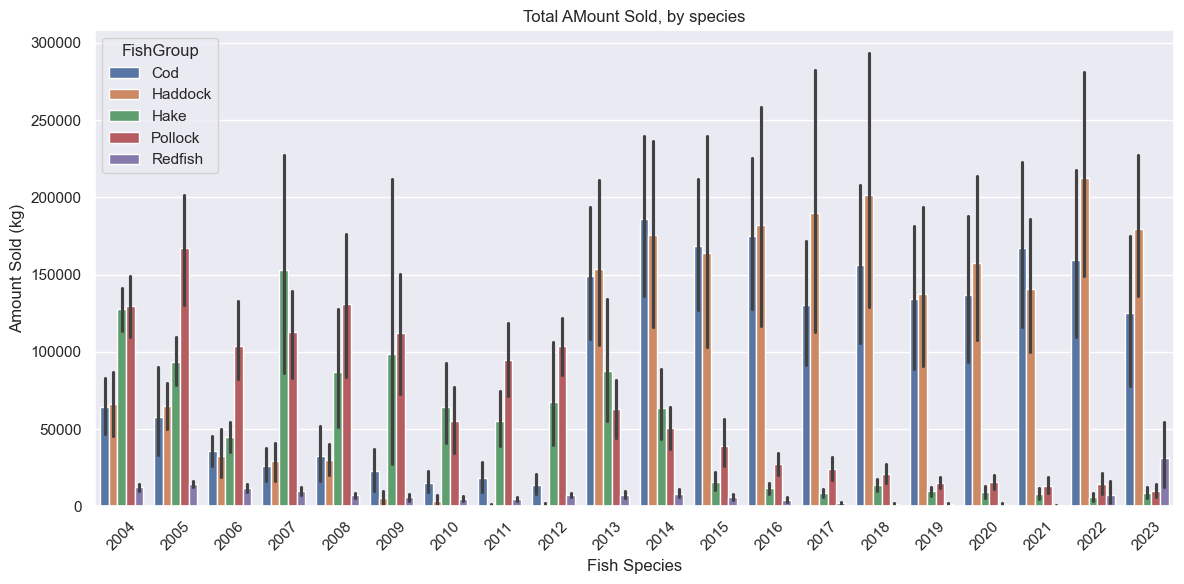

In [36]:
# Extract the year from the Period column
df_agg['Year'] = df_agg['YYYY/MM'].dt.year

sns.barplot(data=df_agg, x='Year', y='Sold', hue='FishGroup')
plt.xlabel('Fish Species')
plt.ylabel('Amount Sold (kg)')
plt.title('Total AMount Sold, by species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

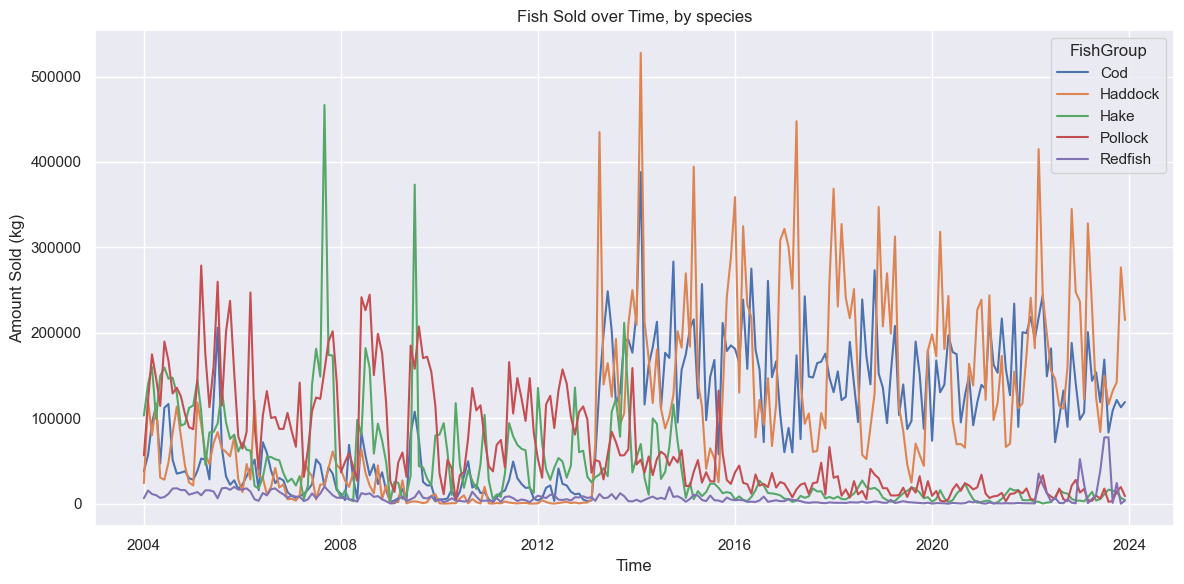

In [20]:

sns.lineplot(data=df_agg, x=df_agg['YYYY/MM'].apply(lambda x: x.to_timestamp()), y='Sold', hue='FishGroup', errorbar=None)
plt.xlabel('Time')
plt.ylabel('Amount Sold (kg)')
plt.title('Fish Sold over Time, by species')
plt.tight_layout()
plt.show();

['Cod' 'Haddock' 'Hake' 'Pollock' 'Redfish']
0 Cod
1 Haddock
2 Hake
3 Pollock
4 Redfish


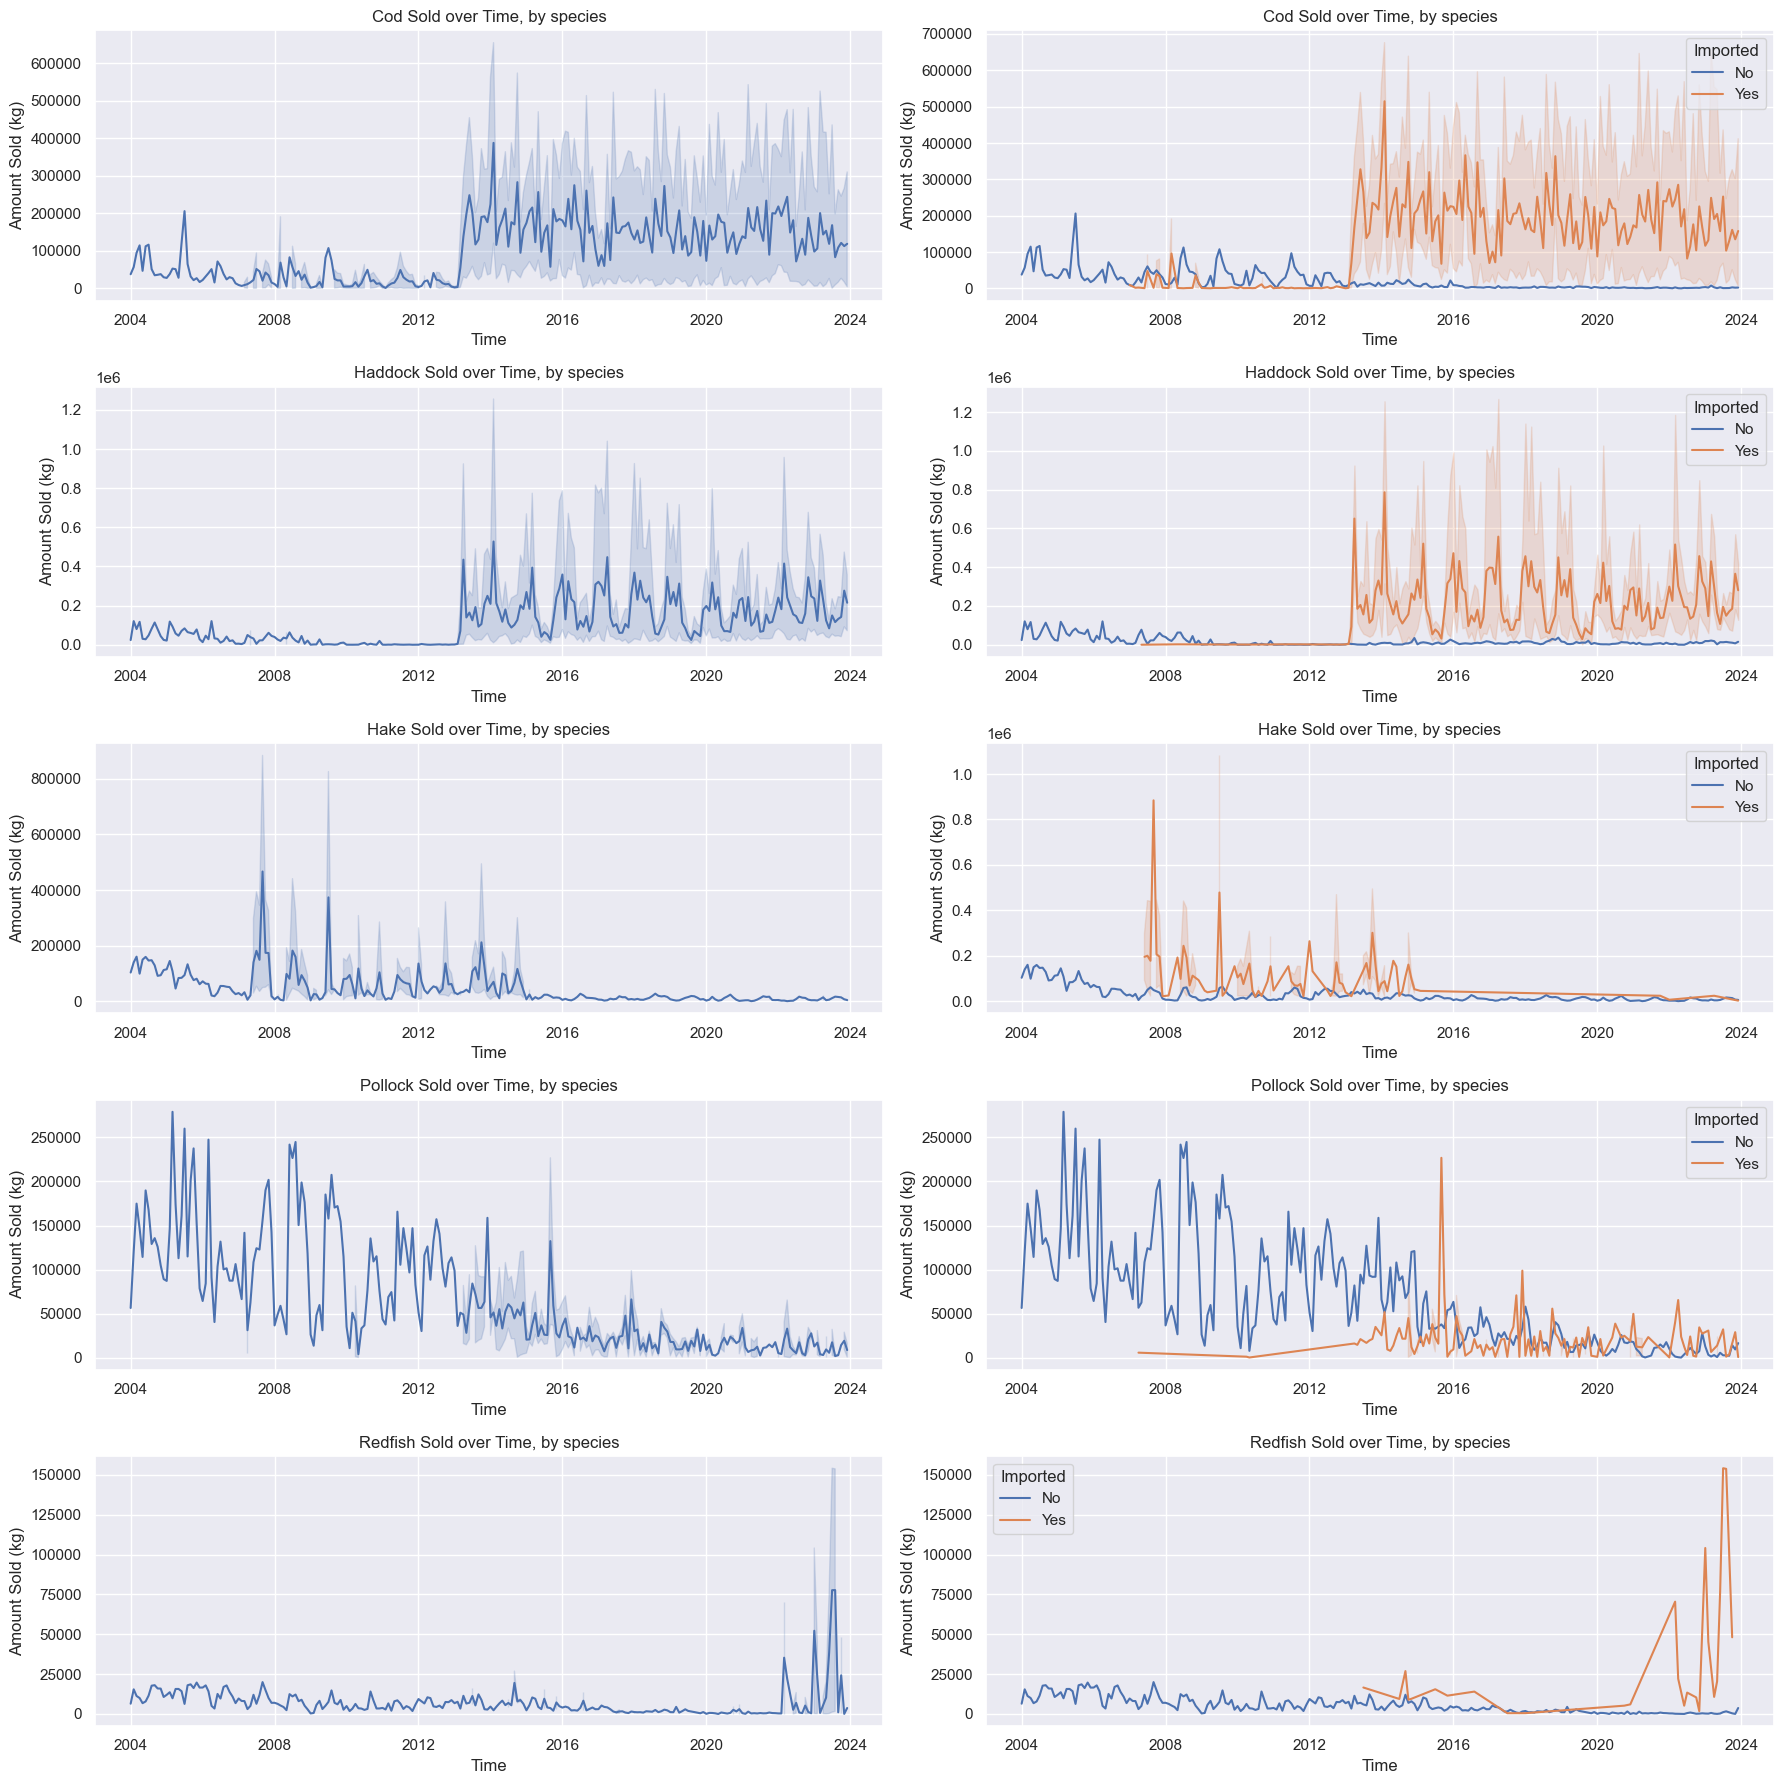

In [26]:
fishes = df_agg['FishGroup'].unique()
print(fishes)
fig, ax = plt.subplots(5, 2, figsize=(18,18))

for idx, fish in enumerate(fishes):
    print(idx, fish)

    sns.lineplot(ax = ax[idx,0], data=df_agg[df_agg['FishGroup'] == fish], x=df_agg['YYYY/MM'].apply(lambda x: x.to_timestamp()), y='Sold')
    ax[idx,0].set_xlabel('Time')
    ax[idx,0].set_ylabel('Amount Sold (kg)')
    ax[idx,0].set_title(f'{fish} Sold over Time, by species')

    sns.lineplot(ax = ax[idx,1], data=df_agg[df_agg['FishGroup'] == fish], x=df_agg['YYYY/MM'].apply(lambda x: x.to_timestamp()), y='Sold', hue='Imported')
    ax[idx,1].set_xlabel('Time')
    ax[idx,1].set_ylabel('Amount Sold (kg)')
    ax[idx,1].set_title(f'{fish} Sold over Time, by species')

plt.tight_layout()
plt.show();

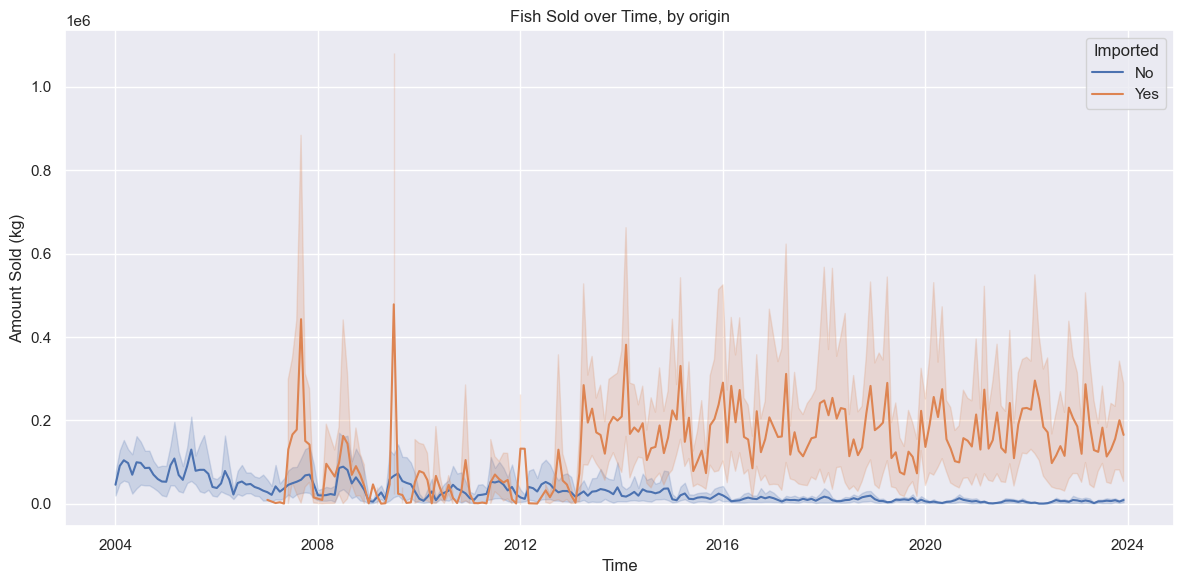

In [22]:
sns.lineplot(data=df_agg, x=df_agg['YYYY/MM'].apply(lambda x: x.to_timestamp()), y='Sold', hue='Imported')
plt.xlabel('Time')
plt.ylabel('Amount Sold (kg)')
plt.title('Fish Sold over Time, by origin')
plt.tight_layout()
plt.show();

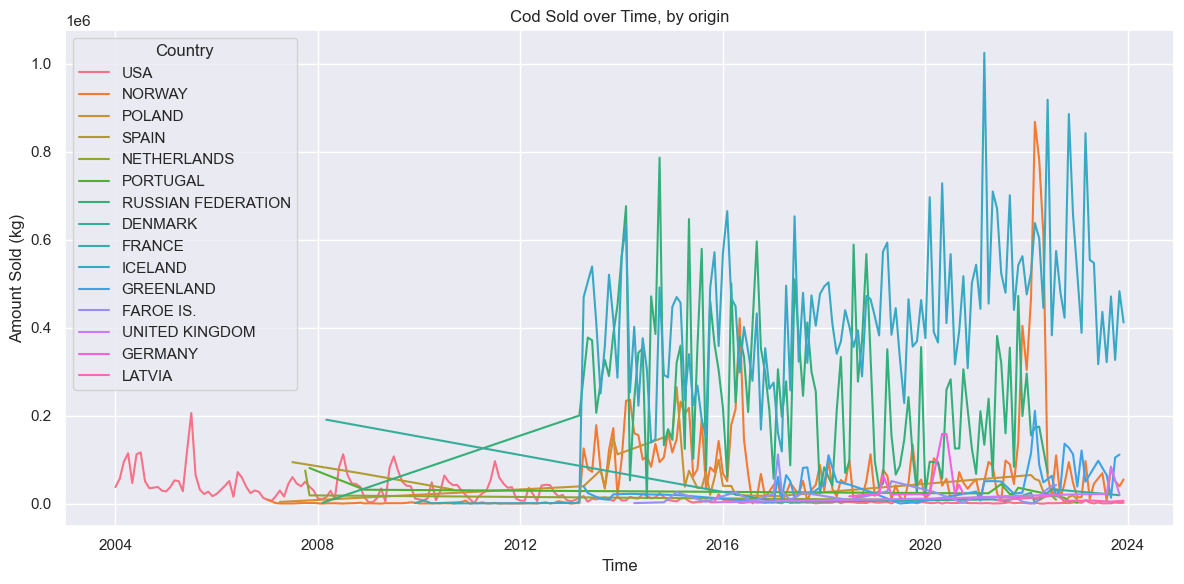

In [23]:
sns.lineplot(data=df_agg[df_agg['FishGroup'] == 'Cod'], x=df_agg['YYYY/MM'].apply(lambda x: x.to_timestamp()), y='Sold', hue='Country')
plt.xlabel('Time')
plt.ylabel('Amount Sold (kg)')
plt.title('Cod Sold over Time, by origin')
plt.tight_layout()
plt.show();

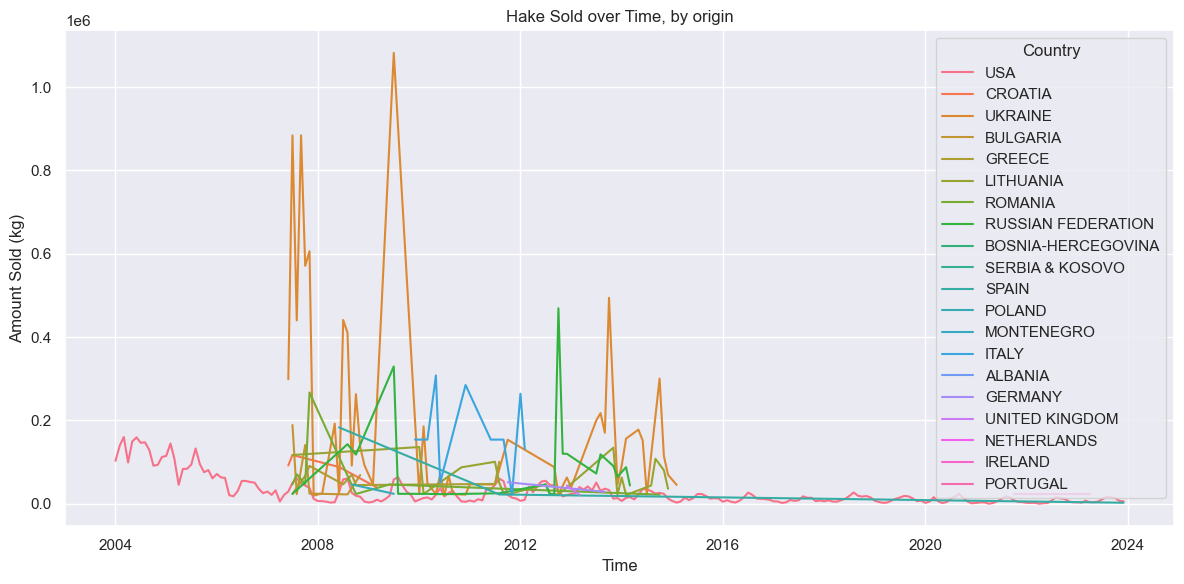

In [24]:
sns.lineplot(data=df_agg[df_agg['FishGroup'] == 'Hake'], x=df_agg['YYYY/MM'].apply(lambda x: x.to_timestamp()), y='Sold', hue='Country')
plt.xlabel('Time')
plt.ylabel('Amount Sold (kg)')
plt.title('Hake Sold over Time, by origin')
plt.tight_layout()
plt.show();